# EDA and Data Visualization (Daily Trends)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime, timedelta
from sklearn.linear_model import LinearRegression

In [2]:
# Load data for building 
building_nr = 1
df = pd.read_csv(f"../data/preprocessed/Building_{building_nr}.csv").astype({'datetime': 'datetime64'}).set_index('datetime')

In [3]:
df.head()

,month,hour,daylight_savings,indoor_temp,avg_unmet_cooling_temp,indoor_hum,equipment_electric_power_kWh,dhw_heating_kWh,cooling_load_kWh,solar_generation_W_kW,...,pred_24h_outdoor_hum,pred_6h_diffuse_solar_W_m2,pred_12h_diffuse_solar_W_m2,pred_24h_diffuse_solar_W_m2,pred_6h_direct_solar_W_m2,pred_12h_direct_solar_W_m2,pred_24h_direct_solar_W_m2,holiday,workday,solar_generation_kW
datetime,,,,,,,,,,,,,,,,,,,,,
2008-01-02 00:00:00,1,1,0.0,18.93,0.0,77.92,9.80,0.0,0.0,0.0,...,91.65,-0.00,170.84,0.0,-0.00,5.32,0.0,True,False,0.0
2008-01-02 01:00:00,1,2,0.0,18.82,0.0,77.97,10.41,0.0,0.0,0.0,...,101.62,16.77,112.24,0.0,1.11,2.04,-0.0,True,False,0.0
2008-01-02 02:00:00,1,3,0.0,18.76,0.0,77.89,10.39,0.0,0.0,0.0,...,105.77,40.08,65.93,0.0,1.74,1.04,0.0,True,False,0.0
2008-01-02 03:00:00,1,4,0.0,18.66,0.0,77.74,10.33,0.0,0.0,0.0,...,92.80,65.63,38.59,-0.0,1.09,0.99,0.0,True,False,0.0
2008-01-02 04:00:00,1,5,0.0,18.62,0.0,77.37,9.41,0.0,0.0,0.0,...,100.62,107.26,15.92,0.0,1.78,0.84,0.0,True,False,0.0


In [4]:
# Add a total load
df['total_load_kWh'] = df['equipment_electric_power_kWh'] + df['dhw_heating_kWh'] + df['cooling_load_kWh']

# Add a total load without cooling
df['total_load_wo_cooling_kWh'] = df['equipment_electric_power_kWh'] + df['dhw_heating_kWh']

# Add a net load
df['net_load_kWh'] = df['total_load_kWh'] - df['solar_generation_kW']


In [5]:
# Group by workdays in Jan and Jul
df_workday_jan = df[(df.index.month == 1) & (df.workday == True)]
df_workday_jul = df[(df.index.month == 7) & (df.workday == True)]

# Group by weekends/holidays in Jan and Jul
df_weekend_jan = df[(df.index.month == 1) & (df.workday == False)]
df_weekend_jul = df[(df.index.month == 7) & (df.workday == False)]

### Energy demand and solar generation in Jan vs Jul for workdays

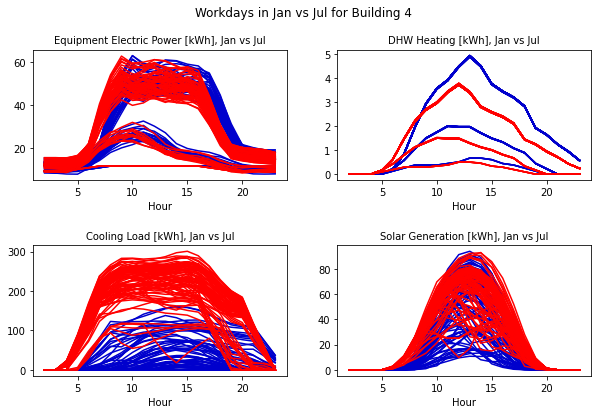

In [6]:
fig, ax = plt.subplots(2, 2, figsize=(10,6))

plt.subplot(2, 2, 1)
col = "equipment_electric_power_kWh"
for idx, day in df_workday_jan.groupby(df_workday_jan.index.date):
    df_plot1 = df_workday_jan[df_workday_jan.index.date == idx].reset_index().rolling(3).mean()
    ax[0,0].plot(col, data=df_plot1, label=idx, color="mediumblue")

for idx, day in df_workday_jul.groupby(df_workday_jul.index.date):
    df_plot1 = df_workday_jul[df_workday_jul.index.date == idx].reset_index().rolling(3).mean()
    ax[0,0].plot(col, data=df_plot1, label=idx, color="red")
ax[0,0].set_title('Equipment Electric Power [kWh], Jan vs Jul',fontsize=10)
ax[0,0].set_xlabel("Hour", fontsize=10)

plt.subplot(2, 2, 2)
col = "dhw_heating_kWh"
for idx, day in df_workday_jan.groupby(df_workday_jan.index.date):
    df_plot2 = df_workday_jan[df_workday_jan.index.date == idx].reset_index().rolling(3).mean()
    ax[0,1].plot(col, data=df_plot2, label=idx, color="mediumblue")

for idx, day in df_workday_jul.groupby(df_workday_jul.index.date):
    df_plot2 = df_workday_jul[df_workday_jul.index.date == idx].reset_index().rolling(3).mean()
    ax[0,1].plot(col, data=df_plot2, label=idx, color="red")
ax[0,1].set_title('DHW Heating [kWh], Jan vs Jul',fontsize=10)
ax[0,1].set_xlabel("Hour", fontsize=10)

plt.subplot(2, 2, 3)
col="cooling_load_kWh"
for idx, day in df_workday_jan.groupby(df_workday_jan.index.date):
    df_plot3 = df_workday_jan[df_workday_jan.index.date == idx].reset_index().rolling(3).mean()
    ax[1,0].plot(col, data=df_plot3, label=idx, color="mediumblue")

for idx, day in df_workday_jul.groupby(df_workday_jul.index.date):
    df_plot3 = df_workday_jul[df_workday_jul.index.date == idx].reset_index().rolling(3).mean()
    ax[1,0].plot(col, data=df_plot3, label=idx, color="red")
ax[1,0].set_title('Cooling Load [kWh], Jan vs Jul',fontsize=10)
ax[1,0].set_xlabel("Hour", fontsize=10)

plt.subplot(2, 2, 4)
col = "solar_generation_kW"
for idx, day in df_workday_jan.groupby(df_workday_jan.index.date):
    df_plot4 = df_workday_jan[df_workday_jan.index.date == idx].reset_index().rolling(3).mean()
    ax[1,1].plot(col, data=df_plot4, label=idx, color="mediumblue")

for idx, day in df_workday_jul.groupby(df_workday_jul.index.date):
    df_plot4 = df_workday_jul[df_workday_jul.index.date == idx].reset_index().rolling(3).mean()
    ax[1,1].plot(col, data=df_plot4, label=idx, color="red")
ax[1,1].set_title('Solar Generation [kWh], Jan vs Jul',fontsize=10)
ax[1,1].set_xlabel("Hour", fontsize=10)

fig.suptitle('Workdays in Jan vs Jul for Building 4')
plt.subplots_adjust(hspace = 0.5)

plt.show()


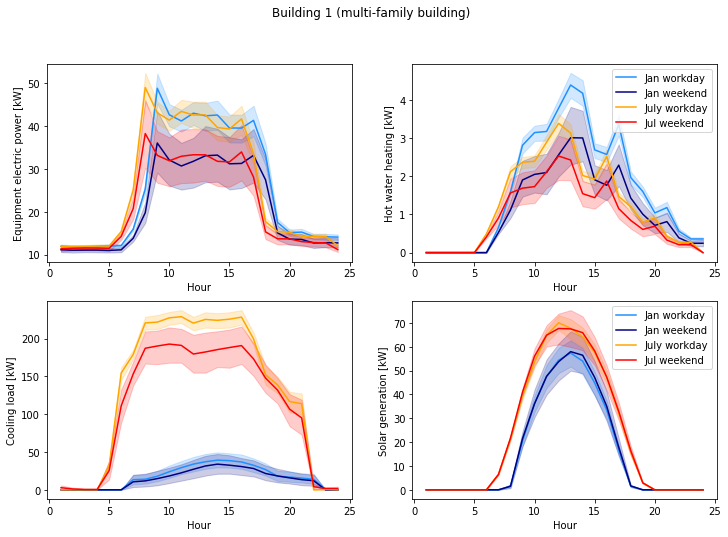

In [7]:
fig, ax = plt.subplots(2,2,figsize=(12,8))
plt.subplot(2, 2, 1)
col = "equipment_electric_power_kWh"
sns.lineplot(data=df_workday_jan, y=col, x='hour', color='dodgerblue')
sns.lineplot(data=df_weekend_jan, y=col, x='hour', color='navy')
sns.lineplot(data=df_workday_jul, y=col, x='hour', color='orange')
sns.lineplot(data=df_weekend_jul, y=col, x='hour', color='red')
plt.ylabel('Equipment electric power [kW]')
plt.xlabel('Hour')
#plt.legend(fontsize=10, loc='upper right')

plt.subplot(2, 2, 2)
col = "dhw_heating_kWh"
sns.lineplot(data=df_workday_jan, y=col, x='hour', label="Jan workday", color='dodgerblue')
sns.lineplot(data=df_weekend_jan, y=col, x='hour', label="Jan weekend", color='navy')
sns.lineplot(data=df_workday_jul, y=col, x='hour', label="July workday", color='orange')
sns.lineplot(data=df_weekend_jul, y=col, x='hour', label="Jul weekend", color='red')
plt.ylabel('Hot water heating [kW]')
plt.xlabel('Hour')
plt.legend(fontsize=10, loc='upper right')

plt.subplot(2, 2, 3)
col = "cooling_load_kWh"
sns.lineplot(data=df_workday_jan, y=col, x='hour', color='dodgerblue')
sns.lineplot(data=df_weekend_jan, y=col, x='hour', color='navy')
sns.lineplot(data=df_workday_jul, y=col, x='hour', color='orange')
sns.lineplot(data=df_weekend_jul, y=col, x='hour', color='red')
plt.ylabel('Cooling load [kW]')
plt.xlabel('Hour')

plt.subplot(2, 2, 4)
col = "solar_generation_kW"
sns.lineplot(data=df_workday_jan, y=col, x='hour', label="Jan workday", color='dodgerblue')
sns.lineplot(data=df_weekend_jan, y=col, x='hour', label="Jan weekend", color='navy')
sns.lineplot(data=df_workday_jul, y=col, x='hour', label="July workday", color='orange')
sns.lineplot(data=df_weekend_jul, y=col, x='hour', label="Jul weekend", color='red')
plt.ylabel('Solar generation [kW]')
plt.xlabel('Hour')
plt.legend(fontsize=10, loc='upper right')

fig.suptitle(f'Building {building_nr} (multi-family building)')
plt.show()

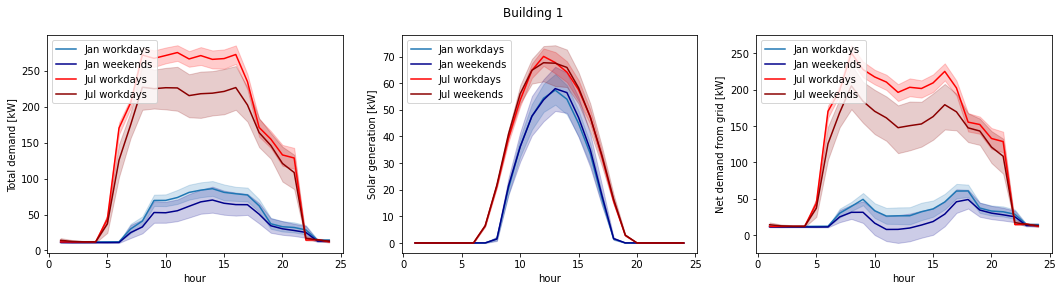

In [22]:
fig, ax = plt.subplots(1,3,figsize=(18,4))
plt.subplot(1, 3, 1)
col = "total_load_kWh"
sns.lineplot(data=df_workday_jan, y=col, x='hour', label="Jan workdays")
sns.lineplot(data=df_weekend_jan, y=col, x='hour', label="Jan weekends", color="darkblue")

sns.lineplot(data=df_workday_jul, y=col, x='hour', label="Jul workdays", color="red")
sns.lineplot(data=df_weekend_jul, y=col, x='hour', label="Jul workdays", color="darkred")
plt.ylabel('Total demand [kW]')
plt.legend(loc='upper left')
#plt.ylim(0,80)

plt.subplot(1, 3, 2)
col = "solar_generation_kW"
sns.lineplot(data=df_workday_jan, y=col, x='hour', label="Jan workdays")
sns.lineplot(data=df_weekend_jan, y=col, x='hour', label="Jan weekends", color="darkblue")
sns.lineplot(data=df_workday_jul, y=col, x='hour', label="Jul workdays", color="red")
sns.lineplot(data=df_weekend_jul, y=col, x='hour', label="Jul weekends", color="darkred")
plt.ylabel('Solar generation [kW]')
plt.legend(loc='upper left')

plt.subplot(1, 3, 3)
col = "net_load_kWh"
sns.lineplot(data=df_workday_jan, y=col, x='hour', label="Jan workdays")
sns.lineplot(data=df_weekend_jan, y=col, x='hour', label="Jan weekends", color="darkblue")
sns.lineplot(data=df_workday_jul, y=col, x='hour', label="Jul workdays", color="red")
sns.lineplot(data=df_weekend_jul, y=col, x='hour', label="Jul weekends", color="darkred")
plt.ylabel('Net demand from grid [kW]')
plt.legend(loc='upper left')
#plt.ylim(0,80)

fig.suptitle('Building 1')
plt.show()

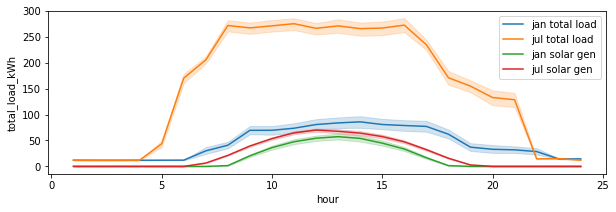

In [10]:
fig, ax = plt.subplots(figsize=(10,3))
#plt.subplot(1, 2, 1)
col = "total_load_kWh"
sns.lineplot(data=df_workday_jan, y=col, x='hour', label="jan total load")
sns.lineplot(data=df_workday_jul, y=col, x='hour', label="jul total load")

#plt.subplot(1, 2, 2)
col = "solar_generation_kW"
sns.lineplot(data=df_workday_jan, y=col, x='hour', label="jan solar gen")
sns.lineplot(data=df_workday_jul, y=col, x='hour', label="jul solar gen")
plt.legend()

# plt.subplot(2, 2, 3)
# col = "cooling_load_kWh"
# sns.lineplot(data=df_workday_jan, y=col, x='hour')
# sns.lineplot(data=df_workday_jul, y=col, x='hour')

# plt.subplot(2, 2, 4)
# col = "solar_generation_kW"
# sns.lineplot(data=df_workday_jan, y=col, x='hour')
# sns.lineplot(data=df_workday_jul, y=col, x='hour')

### Average total load by month for Building 4 (with cooling)

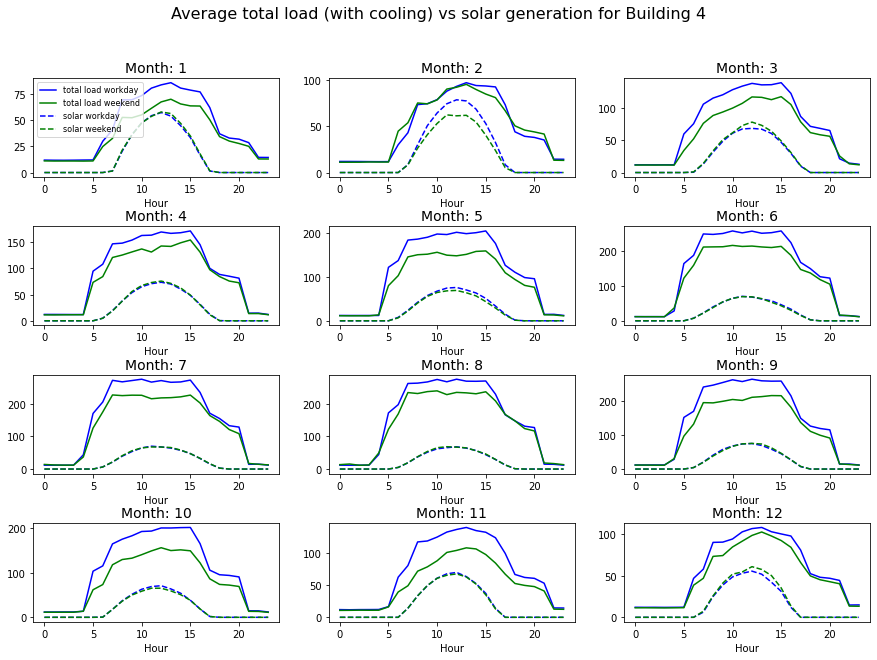

In [14]:
fig, ax = plt.subplots(4, 3, figsize=(15,10))

for month in range(1,13):

    # Group by workdays
    df_workday = df[(df.index.month == month) & (df.workday == True)]

    # Group by weekends/holidays
    df_weekend = df[(df.index.month == month) & (df.workday == False)]

    plt.subplot(4, 3, month)
    col = "total_load_kWh"
    df_workday.groupby(df_workday.index.hour)[col].mean().plot(label="total load workday", color="blue")
    df_weekend.groupby(df_weekend.index.hour)[col].mean().plot(label="total load weekend", color="green")

    col = "solar_generation_kW"
    df_workday.groupby(df_workday.index.hour)[col].mean().plot(label="solar workday", color="blue", linestyle='--')
    df_weekend.groupby(df_weekend.index.hour)[col].mean().plot(label="solar weekend", color="green", linestyle='--')
    plt.xlabel('Hour')
    if month == 1:
        plt.legend(fontsize=8)
    plt.title('Month: '+str(month), fontsize=14)
fig.suptitle('Average total load (with cooling) vs solar generation for Building 4', fontsize=16)
plt.subplots_adjust(hspace=0.5)
plt.show()

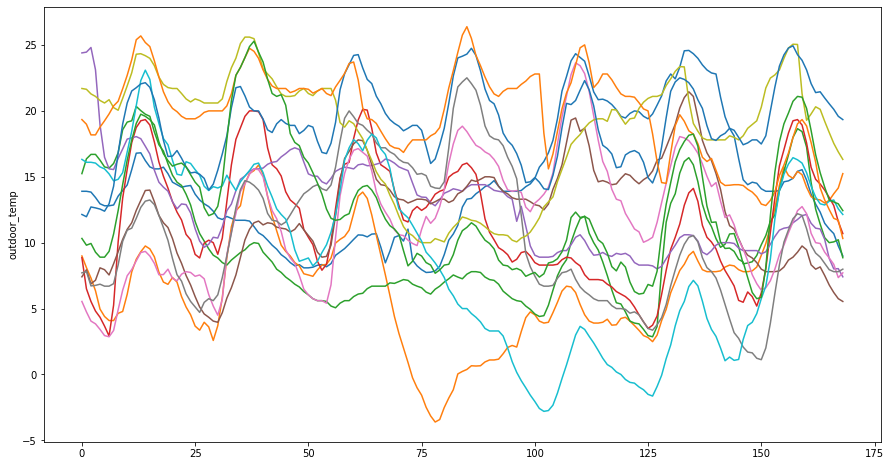

In [15]:
fig, ax = plt.subplots(figsize=(15,8))
datarange_list = pd.date_range(start='2008-07', end='2011-08', freq='W-MON')
#plt.subplot(2, 1, 1)
for date in datarange_list:
    dates = pd.date_range(start=date, end=date+timedelta(days=7), freq='H')
    if dates[-1].month == 1:
        df_plot = df.loc[dates[0]:dates[-1]]
        #df_plot.reset_index()['total_load_kWh'].plot()
        #df_plot.reset_index()['outdoor_temp'].plot()
        sns.lineplot(data=df_plot, y='outdoor_temp', x=np.arange(0,24*7+1), ci=95)

        #df_plot.reset_index()['holiday'].mul(30).plot()
        
# datarange_list = pd.date_range(start='2008-01', end='2011-02', freq='W-MON')
# for date in datarange_list:
#     dates = pd.date_range(start=date, end=date+timedelta(days=7), freq='H')
#     if dates[-1].month == 7:
#         df_plot = df.loc[dates[0]:dates[-1]]
#         df_plot.reset_index()['total_load_kWh'].plot(linestyle='--')

# plt.subplot(2, 1, 2)
# for date in datarange_list:
#     dates = pd.date_range(start=date, end=date+timedelta(days=7), freq='H')
#     if dates[-1].month == 1:
#         df_plot = df.loc[dates[0]:dates[-1]]
#         df_plot.reset_index()['outdoor_temp'].plot()

# datarange_list = pd.date_range(start='2008-01', end='2011-02', freq='W-MON')
# for date in datarange_list:
#     dates = pd.date_range(start=date, end=date+timedelta(days=7), freq='H')
#     if dates[-1].month == 7:
#         df_plot = df.loc[dates[0]:dates[-1]]
#         df_plot.reset_index()['outdoor_temp'].plot(linestyle='--')

<AxesSubplot:xlabel='datetime'>

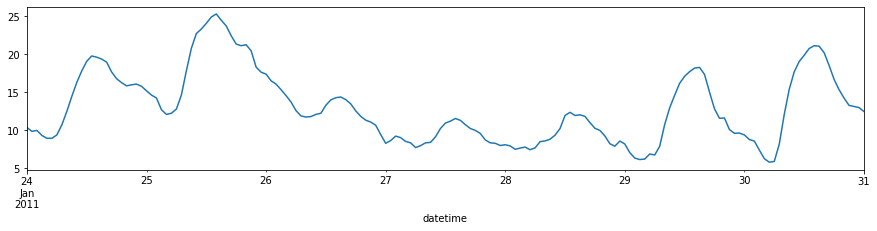

In [19]:
fig, ax = plt.subplots(figsize=(15,3))
df_plot['outdoor_temp'].plot()

<AxesSubplot:xlabel='datetime'>

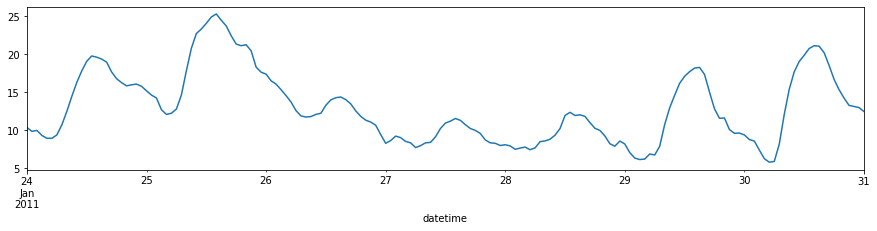

In [20]:
fig, ax = plt.subplots(figsize=(15,3))
df_plot['outdoor_temp'].plot()

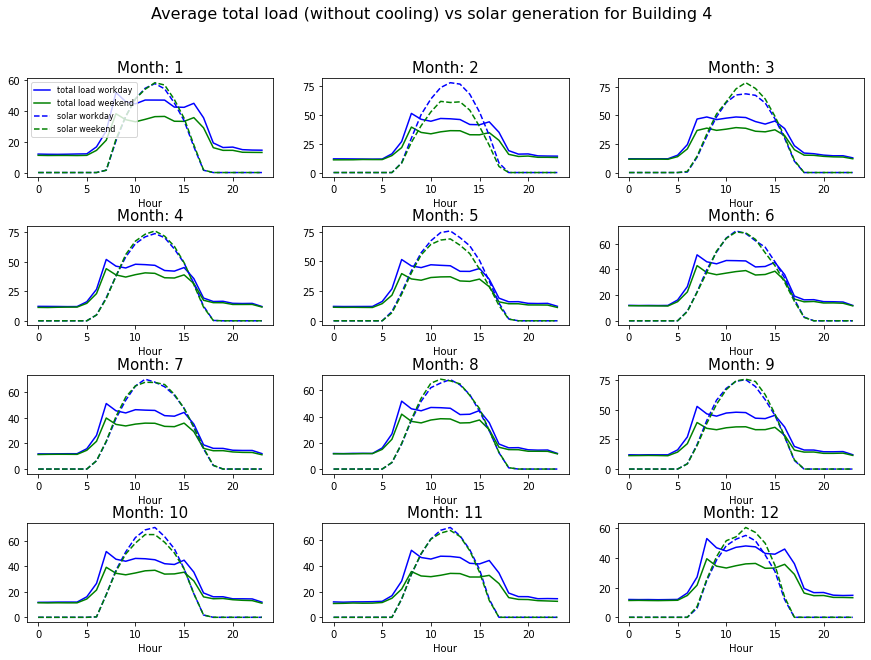

In [21]:
fig, ax = plt.subplots(4, 3, figsize=(15,10))

for month in range(1,13):

    # Group by workdays
    df_workday = df[(df.index.month == month) & (df.workday == True)]

    # Group by weekends/holidays
    df_weekend = df[(df.index.month == month) & (df.workday == False)]

    plt.subplot(4, 3, month)
    col = "total_load_wo_cooling_kWh"
    df_workday.groupby(df_workday.index.hour)[col].mean().plot(label="total load workday", color="blue")
    df_weekend.groupby(df_weekend.index.hour)[col].mean().plot(label="total load weekend", color="green")

    col = "solar_generation_kW"
    df_workday.groupby(df_workday.index.hour)[col].mean().plot(label="solar workday", color="blue", linestyle='--')
    df_weekend.groupby(df_weekend.index.hour)[col].mean().plot(label="solar weekend", color="green", linestyle='--')
    plt.xlabel('Hour')
    if month == 1:
        plt.legend(fontsize=8)
    plt.title('Month: '+str(month), fontsize=15)
fig.suptitle('Average total load (without cooling) vs solar generation for Building 4', fontsize=16)
plt.subplots_adjust(hspace=0.5)
plt.show()